In [10]:
from pathlib import Path
from pydub import AudioSegment

root = Path("../assets_org")
pre = root / "pre"

path = pre / 'part4_12_METRE.wav'
seg = AudioSegment.from_file(path)

In [11]:
rms_list = []
for path in pre.glob('*.wav'):
    seg = AudioSegment.from_wav(path)
    rms_list.append(seg.rms)



In [15]:
rms_list = []
for path in pre.glob('*.wav'):
    seg = AudioSegment.from_wav(path)
    rms_list.append(seg.peak)



AttributeError: 'AudioSegment' object has no attribute 'peak'

PosixPath('../assets_org/pre/part4_12_METRE.wav')

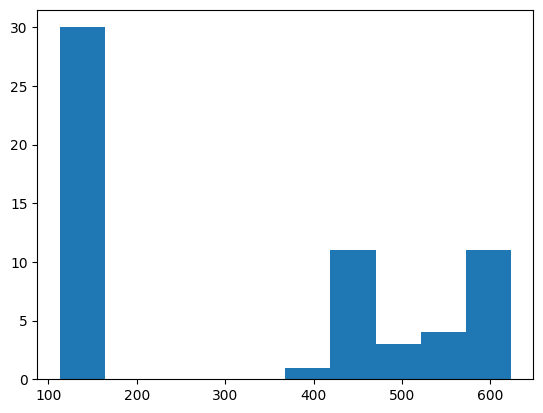

In [12]:
import matplotlib.pyplot as plt
plt.hist(rms_list)
path


In [4]:
seg = AudioSegment.from_file(path)



In [14]:
from pydub.utils import ratio_to_db

target = 600
rms = seg.rms

db = ratio_to_db(target / rms)
new_seg = seg + db
print(new_seg.rms)
new_seg

600


In [48]:
root = Path("../assets_org/")
pre_root = root / "pre"
tar_root = Path("../assets")

dirnames = ["pre", "post"]

TARGET_RMS = 1000

for dirname in dirnames:
    org_dir = root / dirname
    dist_dir = tar_root / dirname
    if not dist_dir.exists():
        dist_dir.mkdir()

    for path in org_dir.glob("*.wav"):
        seg = AudioSegment.from_file(path)
        rms = seg.rms
        db = ratio_to_db(target / rms)
        new_seg = seg + db
        dist_path = dist_dir / path.name

        new_seg.export(dist_path, format="wav")
